Last annotation:
Image path: ..\data\images\synthetic_buildings\drone6.png
Mask (XYXY): [96, 82, 704, 159]


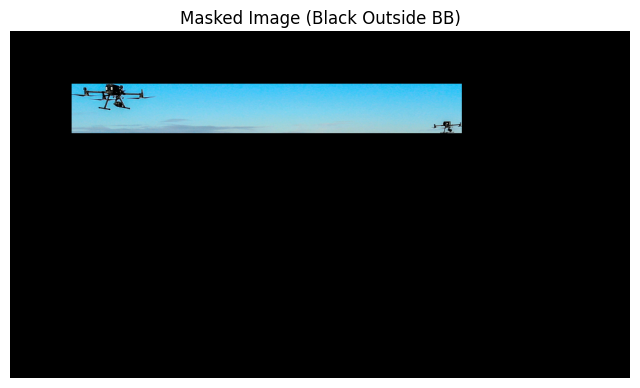

In [32]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# ==========================================================
# DO NOT EDIT ABOVE
# ==========================================================

def show_last_mask(bboxes, base_image_dir="..\\data\\images"):
    if not bboxes:
        raise ValueError("No bounding boxes defined.")

    # Take last entry
    image_rel_path, x1, y1, x2, y2 = bboxes[-1]
    image_path = os.path.join(base_image_dir, image_rel_path)

    print("Last annotation:")
    print(f"Image path: {image_path}")
    print(f"Mask (XYXY): [{x1}, {y1}, {x2}, {y2}]")

    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image not found: {image_path}")

    img = cv2.imread(image_path)
    if img is None:
        raise ValueError("Failed to load image")

    h, w = img.shape[:2]

    # Clamp box to image size
    x1 = max(0, min(x1, w - 1))
    x2 = max(0, min(x2, w))
    y1 = max(0, min(y1, h - 1))
    y2 = max(0, min(y2, h))

    # Create binary mask
    mask = np.zeros((h, w), dtype=np.uint8)
    mask[y1:y2, x1:x2] = 1

    # Create black image
    masked_img = np.zeros_like(img)

    # Copy original pixels ONLY inside mask
    masked_img[mask == 1] = img[mask == 1]

    # Convert to RGB for matplotlib
    masked_img = cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB)

    # Show
    plt.figure(figsize=(8, 5))
    plt.imshow(masked_img)
    plt.title("Masked Image (Black Outside BB)")
    plt.axis("off")
    plt.show()

    return mask


# ==========================================================
# MANUAL MASK LIST (EDIT ONLY THIS PART)
# ==========================================================

bboxes = [
    ("clear_sky\\drone1s.png", 152, 50, 525, 248),
    ("clear_sky\\drone2s.png", 1383, 350, 2415, 1070),
    ("clear_sky\\drone3s.png", 643, 295, 912, 364),
    ("clear_sky\\drone4s.png", 296, 180, 325, 200),
    ("clear_sky\\drone5s.png", 153, 89, 172, 105),
    ("real_buildings\\image1.png", 266, 360, 346, 395),
    ("real_buildings\\image2.png", 201, 195, 223, 204),
    ("real_buildings\\image3.png", 10, 5, 46, 20),
    ("real_buildings\\image4.png", 800, 300, 825, 325),
    ("real_buildings\\image5.png", 612, 216, 583, 257),    
    ("real_buildings\\image6.png", 538, 405, 571, 422),
    ("synthetic_buildings\\drone1.png", 276, 120, 344, 167),
    ("synthetic_buildings\\drone2.png", 252, 44, 369, 102),
    ("synthetic_buildings\\drone3.png", 259, 75, 450, 241),
    ("synthetic_buildings\\drone4.png", 402, 177, 573, 219),
    ("synthetic_buildings\\drone5.png", 656, 351, 731, 412),
    ("synthetic_buildings\\drone6.png", 96, 82, 704, 159),



    # add more below ↓
]

mask = show_last_mask(bboxes)

In [ ]:
import cv2
import numpy as np
import os

# ==========================================================
# CONFIG
# ==========================================================

BASE_IMAGE_DIR = "../data/images"
OUTPUT_DIR = r"C:\Users\noams\OneDrive\Desktop\school\final project\Z_Drone_Final_Project_GA\experiments\bb_on_drones_exp\output"

MASKED_DIR = os.path.join(OUTPUT_DIR, "masked_images")
CROPPED_DIR = os.path.join(OUTPUT_DIR, "cropped_masks")

os.makedirs(MASKED_DIR, exist_ok=True)
os.makedirs(CROPPED_DIR, exist_ok=True)

# ==========================================================
# BOUNDING BOX LIST
# ==========================================================

bboxes = [
    ("clear_sky\\drone1s.png", 152, 50, 525, 248),
    ("clear_sky\\drone2s.png", 1383, 350, 2415, 1070),
    ("clear_sky\\drone3s.png", 643, 295, 912, 364),
    ("clear_sky\\drone4s.png", 296, 180, 325, 200),
    ("clear_sky\\drone5s.png", 153, 89, 172, 105),
    ("real_buildings\\image1.png", 266, 360, 346, 395),
    ("real_buildings\\image2.png", 201, 195, 223, 204),
    ("real_buildings\\image3.png", 10, 5, 46, 20),
    ("real_buildings\\image4.png", 800, 300, 825, 325),
    ("real_buildings\\image5.png", 612, 216, 583, 257),    
    ("real_buildings\\image6.png", 538, 405, 571, 422),
    ("synthetic_buildings\\drone1.png", 276, 120, 344, 167),
    ("synthetic_buildings\\drone2.png", 252, 44, 369, 102),
    ("synthetic_buildings\\drone3.png", 259, 75, 450, 241),
    ("synthetic_buildings\\drone4.png", 402, 177, 573, 219),
    ("synthetic_buildings\\drone5.png", 656, 351, 731, 412),
    ("synthetic_buildings\\drone6.png", 96, 82, 704, 159),



    # add more below ↓
]

# ==========================================================
# PROCESS
# ==========================================================

for rel_path, x1, y1, x2, y2 in bboxes:
    img_path = os.path.join(BASE_IMAGE_DIR, rel_path)

    if not os.path.exists(img_path):
        print(f"❌ Image not found: {img_path}")
        continue

    img = cv2.imread(img_path)
    h, w = img.shape[:2]

    # Fix possible inverted coordinates
    x1, x2 = sorted([max(0, x1), min(w, x2)])
    y1, y2 = sorted([max(0, y1), min(h, y2)])

    # -------- MASKED IMAGE (same size) --------
    mask = np.zeros((h, w), dtype=np.uint8)
    mask[y1:y2, x1:x2] = 1

    masked_img = np.zeros_like(img)
    masked_img[mask == 1] = img[mask == 1]

    base_name = os.path.basename(rel_path)
    masked_out_path = os.path.join(MASKED_DIR, base_name)
    cv2.imwrite(masked_out_path, masked_img)

    # -------- CROPPED MASKED IMAGE --------
    cropped_img = masked_img[y1:y2, x1:x2]
    cropped_out_path = os.path.join(CROPPED_DIR, base_name)
    cv2.imwrite(cropped_out_path, cropped_img)

    print(f"✅ Processed: {rel_path}")

print("\n🎉 Done! All masked and cropped images saved.")


✅ Processed: clear_sky\drone1.png
✅ Processed: clear_sky\drone2.png
✅ Processed: clear_sky\drone3.png
✅ Processed: clear_sky\drone4.png
✅ Processed: clear_sky\drone5.png
✅ Processed: real_buildings\image1.png
✅ Processed: real_buildings\image2.png
✅ Processed: real_buildings\image3.png
✅ Processed: real_buildings\image4.png
✅ Processed: real_buildings\image5.png
✅ Processed: real_buildings\image6.png
✅ Processed: synthetic_buildings\drone1.png
✅ Processed: synthetic_buildings\drone2.png
✅ Processed: synthetic_buildings\drone3.png
✅ Processed: synthetic_buildings\drone4.png
✅ Processed: synthetic_buildings\drone5.png
✅ Processed: synthetic_buildings\drone6.png

🎉 Done! All masked and cropped images saved.
